In [1]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib.cm as cm
from pathlib import Path
import norm
import physconst as pc
import ffmpeg as fp

In [2]:
data_dir = Path('/Users/satoukakeru/lab/Jet_Torus/runs')
#run_ids = ['00a', '00a2']
run_ids = ['00a2']
fname = 'accretion_rate.dat'

In [12]:
data_fbase = 'data'
data_type = 'flt'
nc = 128
#ndata = [116, 302]
ndata = [range(0, 2)]
grid = [nc, nc, nc]
nvar = 7
x1_min, x1_max = -5., 5.  # code units
x2_min, x2_max = -5., 5.  # code units
x3_min, x3_max = -5., 5.  # code units
dx1 = (x1_max - x1_min) / grid[0]
dx2 = (x2_max - x2_min) / grid[1]
dx3 = (x3_max - x3_min) / grid[2]
cell_volume = dx1 * dx2 * dx3

nm = norm.PhysNorm(x=pc.pc, v=pc.c, dens=0.60364*pc.amu, temp=pc.c*pc.c*pc.amu/pc.kboltz, curr=1.)
fnum2year = nm.t / pc.yr * 24.5009005929988

In [13]:
osph = 0.45
x1 = np.linspace(x1_min, x1_max, nc)
x2 = np.linspace(x2_min, x2_max, nc)
x3 = np.linspace(x3_min, x3_max, nc)
x1g, x2g = np.meshgrid(x1, x2, sparse=True)
r2 = x1g * x1g + x2g * x2g
r = np.linspace(0.05, 4.95, 50)

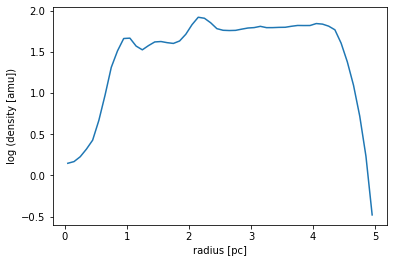

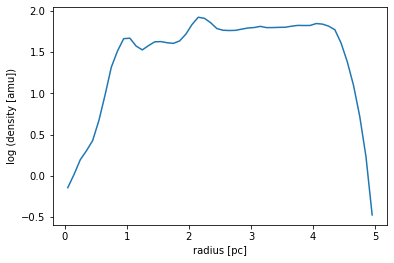

In [17]:
for ir, run_id in enumerate(run_ids):
    for idata in ndata[ir]:
        data_fname = data_dir / run_id / f'{data_fbase}.{idata:0>4d}.{data_type}'

        hydro = np.fromfile(data_fname, dtype=np.float32).reshape((nvar, grid[2], grid[1], grid[0]))
        density = hydro[0, :, :, :]
        dens_cyl = np.sum(density, axis=0) / grid[2]

        dens_rad_pro = []
        for i in range(1, 51):
            local_dis = np.ma.masked_where(r2 < (0.1 * i - 0.1)**2, dens_cyl)
            local_dis = np.ma.masked_where(r2 >= (0.1 * i)**2, local_dis)
            dens_rad_pro.append(np.average(local_dis) * 0.60364)

        pl.figure()
        pl.plot(r, np.log10(dens_rad_pro))
        pl.xlabel(r'radius [pc]')
        pl.ylabel(r'log (density [amu])')

    time = np.arange(idata+1) * fnum2year